# Reservas de hoteis

## Contexto
Os canais de reserva de hotéis online mudaram drasticamente as possibilidades de reserva e o comportamento dos clientes. Um número significativo de reservas de hotéis são canceladas devido a cancelamentos ou não comparecimentos. Os motivos típicos para cancelamentos incluem mudança de planos, conflitos de agendamento, etc. Isso geralmente é facilitado pela opção de fazê-lo gratuitamente ou, de preferência, a um baixo custo, o que é benéfico para os hóspedes do hotel, mas é um fator menos desejável e possivelmente de redução de receita para os hotéis lidarem.

#### Você consegue prever se o cliente vai honrar a reserva ou cancelá-la?

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# Carregando o dataset
hotel_data = pd.read_csv("data/hotel_reservations.csv")

## Pré-processamento de dados

In [14]:
# Removendo colunas de ID e colunas não relevantes para a previsão
hotel_data.drop(columns=['Booking_ID', 'arrival_year', 'arrival_date'], inplace=True)

# Convertendo variáveis categóricas para numéricas
hotel_data = pd.get_dummies(hotel_data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)

# Transformando a variável que queremos prever em numérica: (1: cancelada, 0: não cancelada) 
label_encoder = LabelEncoder()
hotel_data['booking_status'] = label_encoder.fit_transform(hotel_data['booking_status'])

# Normalização de atributos (Excluindo-se a variável de reservas)
scaler = MinMaxScaler()
features_hotel = hotel_data.drop(columns=['booking_status'])
hotel_data[features_hotel.columns] = scaler.fit_transform(features_hotel)

#### Exibição dos dados processados


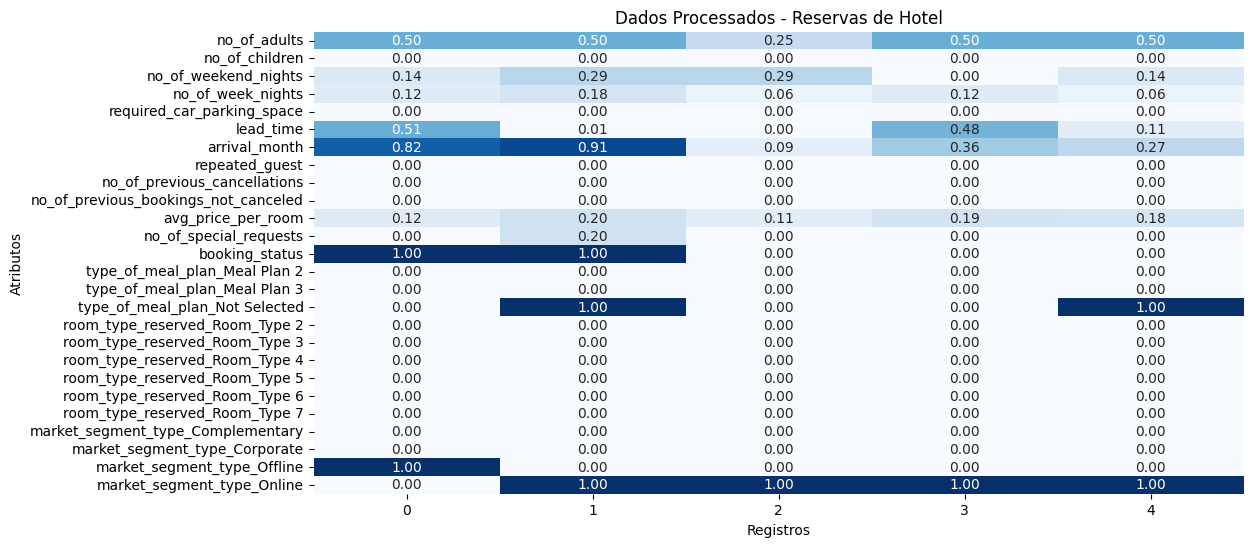

In [12]:
def plot_table(df, title):
    transposed_df = df.head(10).T
    plt.figure(figsize=(12, 6))
    sns.heatmap(transposed_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Registros")
    plt.ylabel("Atributos")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

plot_table(hotel_data.head(), "Dados Processados - Reservas de Hotel")


## Definindo a validação cruzada

In [16]:
# Definindo o número de folds
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Separando features e labels para os dois conjuntos de dados
X_hotel = hotel_data.drop(columns=["booking_status"])
y_hotel = hotel_data["booking_status"]


# Criando os folds
folds_hotel = list(skf.split(X_hotel, y_hotel))

print(f"Criados {k} folds para o dataset")


Criados 10 folds para o dataset
